### Named Entity Recognition

Named-entity recognition (NER) (also known as (named) entity identification, entity chunking, and entity extraction) is a subtask of information extraction that seeks to locate and classify named entities mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc. (Wikipedia)

In [55]:
%%capture
%pip install wikipedia
%pip install textacy
%pip install spacy

In [56]:
# %%python -m spacy download en_core_web_lg

# Use en_core_web_sm if en_core_web_lg takes too long to download and load, but it will be at the cost of entity recognition accuracy

# %python -m spacy download en_core_web_sm
# nlp = spacy.load('en_core_web_sm')

In [1]:
import pandas as pd
import spacy

Spacy provides us with some pretrained models that are able to quite accurately detect entities, parts of speech and more.


In [2]:
nlp = spacy.load('en_core_web_lg') # Use en_core_web_sm if en_core_web_lg takes too long to download and load, but it will be at the cost of entity recognition accuracy

Throughout this laboratory we're going to work on some of Donald Trump's tweets (you can find the dataset in the Virtual Campus Lab 8 folder)

In [4]:
tweets = pd.read_csv("all_djt_tweets.csv")

tweets.head()

C:\Users\bogda\AppData\Local\Temp/ipykernel_16664/2429250133.py:1: DtypeWarning: Columns (0,1,2,3,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv("all_djt_tweets.csv")


,Unnamed: 0,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,0,Twitter for iPhone,Over 90% approval rating for your all time fav...,Mon Aug 27 00:39:38 +0000 2018,27040,106838.0,False,1.033877e+18
1,1,Twitter for iPhone,“Mainstream Media tries to rewrite history to ...,Sun Aug 26 22:01:33 +0000 2018,21346,76682.0,False,1.033837e+18
2,2,Twitter for iPhone,Fantastic numbers on consumer spending release...,Sun Aug 26 14:31:06 +0000 2018,18960,87334.0,False,1.033724e+18
3,3,Twitter for iPhone,"...And it will get, as I have always said, muc...",Sun Aug 26 14:27:16 +0000 2018,14963,62956.0,False,1.033723e+18
4,4,Twitter for iPhone,RT @realDonaldTrump: Social Media Giants are s...,Sun Aug 26 14:25:47 +0000 2018,50142,0.0,True,1.033722e+18


In [4]:
def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [5]:
explain_text_entities(tweets['text'][9])
tweets['text'][9]

Entity: Friday, Label: DATE, Absolute or relative dates or periods
Entity: U.S.A., Label: GPE, Countries, cities, states


'Stock Market hit all time high on Friday. Congratulations U.S.A.!'

In [6]:
explain_text_entities(tweets['text'][30])
tweets['text'][30]

Entity: Department of Justice, Label: ORG, Companies, agencies, institutions, etc.
Entity: Jeff, Label: PERSON, People, including fictional
Entity: Comey, Label: ORG, Companies, agencies, institutions, etc.
Entity: Mueller, Label: PERSON, People, including fictional
Entity: McCabe, Strzok, Page, Ohr, Label: ORG, Companies, agencies, institutions, etc.


'“Department of Justice will not be improperly influenced by political considerations.” Jeff, this is GREAT, what everyone wants, so look into all of the corruption on the “other side” including deleted Emails, Comey lies &amp; leaks, Mueller conflicts, McCabe, Strzok, Page, Ohr......'

#### Entitities Explained

|Type|Description|
|---|---|
|PERSON|People, including fictional.|
|NORP|Nationalities or religious or political groups.|
|FAC|Buildings, airports, highways, bridges, etc.|
|ORG|Companies, agencies, institutions, etc.|
|GPE|Countries, cities, states.|
|LOC|Non-GPE locations, mountain ranges, bodies of water.|
|PRODUCT|Objects, vehicles, foods, etc. (Not services.)|
|EVENT|Named hurricanes, battles, wars, sports events, etc.|
|WORK_OF_ART|Titles of books, songs, etc.|
|LAW|Named documents made into laws.|
|LANGUAGE|Any named language.|
|DATE|Absolute or relative dates or periods.|
|TIME|Times smaller than a day.|
|PERCENT|Percentage, including "%".|
|MONEY|Monetary values, including unit.|
|QUANTITY|Measurements, as of weight or distance.|
|ORDINAL|"first", "second", etc.|
|CARDINAL|Numerals that do not fall under another type.|

In [7]:
one_sentence = tweets['text'][0]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent', jupyter=True)

In [8]:
one_sentence = tweets['text'][240]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent', jupyter=True)

In [9]:
one_sentence = tweets['text'][300]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent', jupyter=True)

In [10]:
one_sentence = tweets['text'][450]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

One simple use case for NER is to automatically redact names. This can be quite useful for certain scenarios.

For example, to ensure that your company data complies with GDPR when making a large set of documents public you might want to remove all the names of people.



In [11]:
def replace_name_with_placeholder(token):
    if token.ent_iob != 0 and token.ent_type_ == "PERSON":
        return "[REDACTED] "
    else:
        return token.text + " "

In [12]:
def scrub(text):
    doc = nlp(text)
    with doc.retokenize() as retokenizer:
        for ent in doc.ents:
            retokenizer.merge(ent)
    tokens = map(replace_name_with_placeholder, doc)
    return "".join(tokens)

In [13]:
print("Before:")
one_sentence = tweets['text'][450]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

print("\nAfter:")
one_sentence = scrub(tweets['text'][450])
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

Before:



After:


### Exercise 1 - Play a game with your colleagues
Find a wikipedia article about a person or character of your choice.

Redact all the names from the page. 

Show only the final (redacted) text to a colleague and see if they can tell who the wiki page is about.


In [14]:
import wikipedia
character_wiki_page = wikipedia.page(pageid=68105322)

In [15]:
print("Before:")
doc = nlp(character_wiki_page.content)
spacy.displacy.render(doc, style='ent',jupyter=True)

Before:


In [16]:
print("\nAfter:")
doc = nlp(scrub(character_wiki_page.content))
print(doc)


After:
[REDACTED] ( born 2 February 1995 ) is a Canadian IFBB professional bodybuilder . Bumstead is the reigning Mr. [REDACTED] winner , having won the competition in 2019 , 2020 and 2021 . He was also the runner - up in 2017 and 2018 . 


 = = Early life = = 
 Bumstead was born and raised in Ottawa , Ontario , where he was involved in multiple sports through his childhood , playing football , baseball , basketball , and hockey in high school . He started weightlifting at the age of 14 , and between the ninth and twelfth grade , he went from 170 to 225 pounds , growing his legs the most . After building what he thought was a good physique , Bumstead met his sister 's boyfriend , professional bodybuilder [REDACTED] , who has coached him since . 


 = = Career = = 
 Bumstead made his competitive debut aged 19 in 2014 and obtained his IFBB pro card aged 21 after claiming the 2016 IFBB North American Bodybuilding Championship . After multiple shows , Bumstead was the runner - up of the 2

Getting noun chunks from our corpus.

Noun chunks are noun phrases - not a single word, but a short phrase which describes the noun. For example, "the blue skies" or "the world’s largest conglomerate".

In [17]:
example_text = tweets['text'][9]
doc = nlp(example_text)
spacy.displacy.render(doc, style='ent', jupyter=True)

for idx, sentence in enumerate(doc.sents):
    for noun in sentence.noun_chunks:
        print(f"sentence {idx+1} has noun chunk '{noun}'")

sentence 1 has noun chunk 'Stock Market'
sentence 1 has noun chunk 'all time'
sentence 1 has noun chunk 'Friday'
sentence 2 has noun chunk 'Congratulations'


### Part-of-speech tagging
POS tagging associates tags such as adverb, verb, noun, adjective, etc. to words.

POS is different than NER. For example a noun does not necessarily have to be an entity. (Stock Market from the example above is a noun, but not an entity)


In [18]:
one_sentence = tweets['text'][300]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent', jupyter=True)

for token in doc:
    print(token, token.pos_)

Incredibly ADV
beautiful ADJ
ceremony NOUN
as SCONJ
U.S. PROPN
Korean PROPN
War PROPN
remains NOUN
are AUX
returned VERB
to ADP
American ADJ
soil NOUN
. PUNCT
Thank VERB
you PRON
to ADP
Honolulu PROPN
and CCONJ
all PRON
of ADP
our PRON
great ADJ
Military ADJ
participants NOUN
on ADP
a DET
job NOUN
well ADV
done VERB
. PUNCT
A DET
special ADJ
thanks NOUN
to ADP
Vice PROPN
President PROPN
Mike PROPN
Pence PROPN
on ADP
delivering VERB
a DET
truly ADV
magnificent ADJ
tribute NOUN
! PUNCT


What does Trump talk about in his tweets?

One way to explore this would be to mine out all the entities and nouns from all his tweets.


In [ ]:
%%capture
%pip install seaborn

In [19]:
import random
from collections import Counter # for counting
import seaborn as sns # for visualization
import matplotlib.pyplot as plt
import pandas as pd
import json
from IPython.display import Markdown, display
plt.style.use('seaborn')
sns.set(font_scale=2)

def pretty_print(pp_object):
    print(json.dumps(pp_object, indent=2))
    

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [20]:
text = tweets['text'].str.cat(sep=' ')
# spaCy enforces a max limit of 1000000 characters for NER and similar use cases.
# Since `text` might be longer than that, we will slice it off here
max_length = 1000000-1
text = text[:max_length]

# removing URLs and '&amp' substrings using regex
import re
url_reg  = r'[a-z]*[:.]+\S+'
text   = re.sub(url_reg, '', text)
noise_reg = r'\&amp'
text   = re.sub(noise_reg, '', text)

In [21]:
doc = nlp(text)

In [22]:
# Let's get rid of stop words
trump_topics = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
        trump_topics.append(token)
        
trump_topics = [str(x) for x in trump_topics]

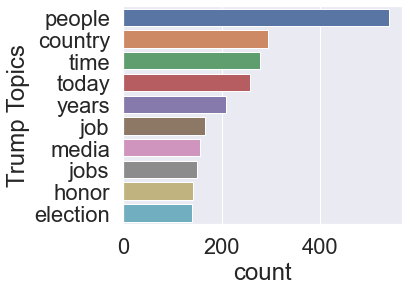

In [23]:
df_nouns = pd.DataFrame(trump_topics, columns=["Trump Topics"])
df_nouns
plt.figure(figsize=(5,4))
sns.countplot(y="Trump Topics",
             data=df_nouns,
             order=df_nouns["Trump Topics"].value_counts().iloc[:10].index)
plt.show()

Looking at most relevant nouns does give us some general information of what he discusses in his tweets, but it is not very insightful.

Let's try to do the same thing using entities rather than nouns.

In [24]:
trump_topics = []
for ent in doc.ents:
    if ent.label_ not in ["PERCENT", "CARDINAL", "DATE"]:
#         print(ent.text,ent.label_)
        trump_topics.append(ent.text.strip())

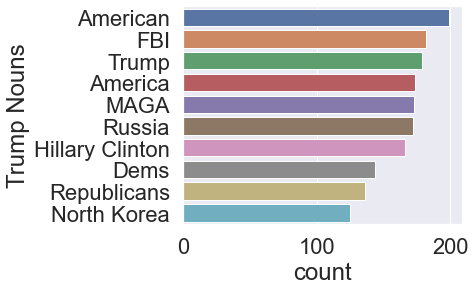

In [25]:
df_ttopics = pd.DataFrame(trump_topics, columns=["Trump Nouns"])
plt.figure(figsize=(5,4))
sns.countplot(y="Trump Nouns",
             data=df_ttopics,
             order=df_ttopics["Trump Nouns"].value_counts().iloc[1:11].index)
plt.show()

### Exercise 2 - Most relevant entities



Find the following most relevant entities/pos components for a corpus of your choice (e.g. gutenberg book(s), reddit posts, public datasets like the ones given in the extra folder, etc.) in the following ways:


In [ ]:
%%capture
%pip install praw

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import praw
reddit = praw.Reddit(client_id='sIXZTihLNiKiHw',
                     client_secret='EjfAsmz5z8mDbZohe4UPYTPIZsYmOQ',
                     user_agent='Test1', check_for_async=False)

In [ ]:
posts = reddit.subreddit('europe').top('all', limit=300)

text = ''
for post in posts:
    text += post.title + '.' + post.selftext + '.'

In [ ]:
doc = nlp(text)


1. Most relevant 10 verbs


In [ ]:
news_verbs = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == "VERB") and (len(str(token))>2):
        news_verbs.append(token)
        
news_verbs = [str(x) for x in news_verbs]

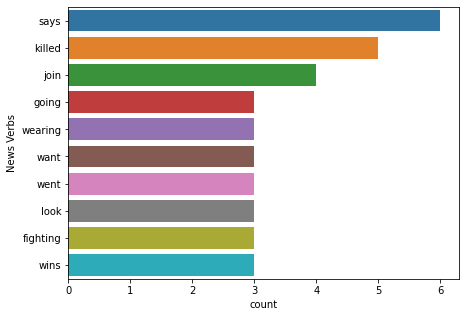

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_verbs = pd.DataFrame(news_verbs, columns=["News Verbs"])
plt.figure(figsize=(7,5))
sns.countplot(y="News Verbs",
             data=df_verbs,
             order=df_verbs["News Verbs"].value_counts().iloc[:10].index)
plt.show()


2. Most relevant 10 entities


In [ ]:
news_ents = []
for ent in doc.ents:
    if ent.label_ not in ["PERCENT", "CARDINAL", "DATE"]:
        news_ents.append(ent.text.strip())

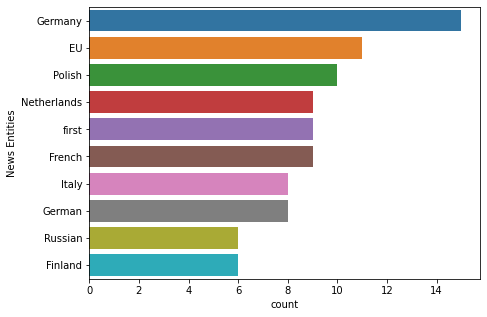

In [ ]:
df_ents = pd.DataFrame(news_ents, columns=["News Entities"])
plt.figure(figsize=(7,5))
sns.countplot(y="News Entities",
             data=df_ents,
             order=df_ents["News Entities"].value_counts().iloc[1:11].index)
plt.show()


3. Most relevant 10 person entities


In [ ]:
news_people = []
for ent in doc.ents:
    if ent.label_ in ["PERSON"]:
        news_people.append(ent.text.strip())

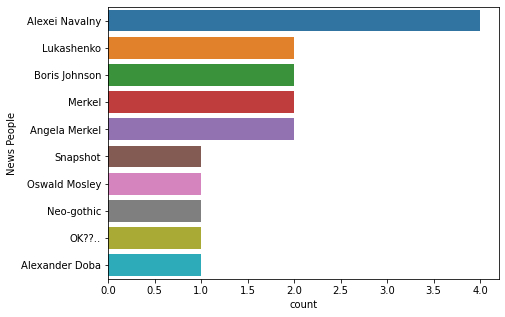

In [ ]:
df_people = pd.DataFrame(news_people, columns=["News People"])
plt.figure(figsize=(7,5))
sns.countplot(y="News People",
             data=df_people,
             order=df_people["News People"].value_counts().iloc[1:11].index)
plt.show()


4. Most relevant 10 date entities


In [ ]:
news_date = []
for ent in doc.ents:
    if ent.label_ in ["DATE"]:
        news_date.append(ent.text.strip())

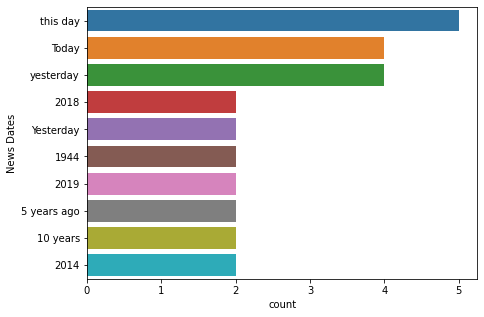

In [ ]:
df_date = pd.DataFrame(news_date, columns=["News Dates"])
plt.figure(figsize=(7,5))
sns.countplot(y="News Dates",
             data=df_date,
             order=df_date["News Dates"].value_counts().iloc[1:11].index)
plt.show()

Thanks to the POS information that we have available we can do pattern matching in our data.

Let's investigate what Trumps has to say about:

1. Himself - "I am ..."
2. Russia - "Russia is ..."
3. Democrats - "Democrats are ..."

Below you have a pattern that finds all the cases where adjectives come after "Democrats are" or "Democrats were" and with an optional adverb between the verb and the adjective.

In [ ]:
[{'LOWER': 'russia'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'}, {'POS': 'ADJ'}]

[{'LOWER': 'russia'},
 {'LEMMA': 'be'},
 {'POS': 'ADV', 'OP': '*'},
 {'POS': 'ADJ'}]

**This translates to a token whose lowercase form matches "russia" (like Russia, russia or RuSSiA), followed by a token with the lemma "be" (for example, is, was, or 's), followed by an optional adverb, followed by an adjective.**

The optional adverb makes sure you won't miss adjectives with intensifiers - constructs like "pretty awful" or "very nice".

This kind of adjective mining can then be used as features to do aspect-based sentiment analysis, which is finding sentiment with respect to specific entities or words.

In [26]:
from spacy.matcher import Matcher
#doc = nlp(text)
matcher = Matcher(nlp.vocab)
matched_sents = [] # collect data of matched sentences to be visualized

def collect_sents(matcher, doc, i, matches, label='MATCH'):
    """
    Function to help reformat data for displacy visualization
    """
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    
    # append mock entity for match in displaCy style to matched_sents
    
    if doc.vocab.strings[match_id] == 'DEMOCRATS':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'DEMOCRATS'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    elif doc.vocab.strings[match_id] == 'RUSSIA':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
               'end': span.end_char - sent.start_char,
               'label': 'RUSSIA'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    elif doc.vocab.strings[match_id] == 'I':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
               'end': span.end_char - sent.start_char,
               'label': 'NARC'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    
# declare different patterns
russia_pattern = [{'LOWER': 'russia'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'},
           {'POS': 'ADJ'}]
democrats_pattern = [{'LOWER': 'democrats'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'},
           {'POS': 'ADJ'}]
i_pattern = [{'LOWER': 'i'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'},
           {'POS': 'ADJ'}]

matcher.add('DEMOCRATS', [democrats_pattern], on_match = collect_sents)  # add pattern
matcher.add('RUSSIA', [russia_pattern], on_match = collect_sents)  # add pattern
matcher.add('I', [i_pattern], on_match = collect_sents)  # add pattern
matches = matcher(doc)

spacy.displacy.render(matched_sents, style='ent', manual=True, jupyter=True,  options = {'colors': {'NARC': '#6290c8', 'RUSSIA': '#cc2936', 'DEMOCRATS':'#f2cd5d'}})

### Exercise 3 - Pattern Matching

Create a pattern of your own and display all of the tweets that match to it.

The pattern can be in relation to anyone/anything. 

Same goes for the structure of the pattern. Just make sure to not create a pattern identical to one of the 3 given as example above.

In [27]:
matcher = Matcher(nlp.vocab)
matched_sents = [] # collect data of matched sentences to be visualized

def collect_sents(matcher, doc, i, matches, label='MATCH'):
    """
    Function to help reformat data for displacy visualization
    """
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    
    # append mock entity for match in displaCy style to matched_sents
    
    if doc.vocab.strings[match_id] == 'CHINA':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'CHINA'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
        
china_pattern = [{'LOWER': 'china'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'}, {'POS': 'ADJ'}]

matcher.add('CHINA', [china_pattern], on_match = collect_sents)  # add pattern
matches = matcher(doc)

spacy.displacy.render(matched_sents, style='ent', manual=True, jupyter=True,  options = {'colors': {'CHINA': '#cc2936'}})

### Grammatical structure - Dependency parsing
One of the things that the spacy package supports is called dependency parsing.

Dependency parsing analyzes the grammatical structure of a sentence. It establishes a "tree" like structure between a "root" word and those that are related to it by branches of some manner.

In [6]:
example_text = tweets['text'][180]
doc = nlp(example_text)

In [14]:
options = {
    'compact': True, 
    'bg': '#23272e',
    'color': 'white', 
    'font': 'Trebuchet MS'
}
spacy.displacy.render(doc, jupyter=True, style='dep', options=options)


We can understand these relationship as a parent-child format as well if we look at them one word at a time. (as seen  in the cell below)

**"Wacky"** is the first token's text and it has a **"compound"** dependency on another token. The token with which it shares a compound dependency has **"Omarosa"** as text and **"PROPN"** (proper noun) as part of speech tag. 

In [30]:
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
          [child for child in token.children])

Wacky compound Omarosa PROPN []
Omarosa nsubj has VERB [Wacky]
already advmod has VERB []
has ROOT has VERB [Omarosa, already, Agreement, !]
a det Agreement PROPN []
fully advmod signed VERB []
signed amod Agreement PROPN [fully]
Non compound Agreement PROPN []
- compound Agreement PROPN []
Disclosure compound Agreement PROPN []
Agreement dobj has VERB [a, signed, Non, -, Disclosure]
! punct has VERB []


### Question Generation
Let's try to automatically (and relatively naively) generate questions out of sentences using the tools that spacy and textacy provide:



*   Subject of Verb
*   Object of Verb





In [1]:
from textacy.spacier import utils as spacy_utils

def para_to_ques(eg_text):
    """
    Generates a few simple questions by slot filling pieces from sentences
    """
    doc = nlp(eg_text)
    results = []
    sentence = doc.sents[0]
    
    root = sentence.root
    
    ask_about = spacy_utils.get_subjects_of_verb(root) # Subject of verb
    answers = spacy_utils.get_objects_of_verb(root) # Object of verb
    
    subject = ask_about[0] if ask_about[0].pos_ == 'PROPN' else ask_about[0].text.lower()
    
    if len(ask_about) > 0 and len(answers) > 0:
        if root.lemma_ == "be":
            question = f'What {root} {subject}?'
        else:
            if root.morph.get('Tense')[0] == 'Past':
                question = f'What did {subject} {root.lemma_}?'
            else:
                question = f'What does {subject} {root.lemma_}?'
            
        results = {
            'question': question, 
            'answers': answers
        }
            
    return results

In [2]:
example_text = tweets['text'][180]
doc = nlp(example_text)
spacy.displacy.render(doc, style='ent', jupyter=True)
print(para_to_ques(example_text))

NameError: name 'tweets' is not defined

### Exercise 4 - Asking questions

Modify the para_to_ques() function in order for it to correctly display the questions for the following statements:


*   'Jane Austen wrote her first book.'
*   'Michael Jordan won his first championship.'
*   'She ate chips at home.'


The output questions should be:


*   'What did Austen write?'


In [61]:
text = 'Jane Austen wrote her first book.'
doc = nlp(text)
spacy.displacy.render(doc, style='ent', jupyter=True)
print(para_to_ques(text))

[{'question': 'What did Austen write?', 'answers': [book]}]



*   'What did Jordan win'? ('What did Michael Jordan win?' also works)


In [62]:
text = 'Michael Jordan won his first championship.'
doc = nlp(text)
spacy.displacy.render(doc, style='ent', jupyter=True)
print(para_to_ques(text))

[{'question': 'What did Jordan win?', 'answers': [championship]}]



*   'What did she eat?' (careful not to capitalize "she")






In [63]:
text = 'She ate chips at home.'
doc = nlp(text)
spacy.displacy.render(doc, style='ent', jupyter=True)
print(para_to_ques(text))

c:\Python310\lib\site-packages\spacy\displacy\__init__.py:205: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


[{'question': 'What did she eat?', 'answers': [chips]}]
